Merge statistics

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
You should consider upgrading via the '/Users/francescopisu/Workspace/Research/projects/DTI/tract_stats/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#stats_path = os.path.join(os.getcwd(), 'stats')
stats_path = Path(__file__).parent.parent.joinpath('MATLAB/output/statistics')
df_path = '../data/subjects.xlsx'

In [3]:
df = pd.read_excel(df_path)

In [31]:
df.head()

,Unnamed: 0,sub,age,sex,structure,ad_mean,ad_sd,fa_mean,fa_sd,md_mean,md_sd,rd_mean,rd_sd,volumes,group
0,0,141,8.78,M,AF left,1.123547,0.101270,0.404942,0.075711,0.773897,0.034548,0.599072,0.047808,88288,limbic
1,1,141,8.78,M,AF right,1.096998,0.056806,0.400287,0.058979,0.757894,0.031656,0.588342,0.047803,75152,limbic
2,2,141,8.78,M,ATR left,1.126695,0.076797,0.424555,0.078426,0.756128,0.053716,0.570845,0.077731,41872,radiation
3,3,141,8.78,M,ATR right,1.135804,0.089915,0.412178,0.084971,0.766763,0.062722,0.582243,0.088679,40960,radiation
4,4,141,8.78,M,CA,1.223517,0.091960,0.429182,0.085684,0.814360,0.085383,0.609782,0.111969,6184,monolateral


In [55]:
data.head()

,structure,avg_streamline_length,total_length,volume,vol_length_ratio,endpoint1_density,endpoint2_density,midpoint_density,sub
0,AF left,103.022730,206045.460574,25474,8.088461,1.269036,1.265823,1.381215,57
1,AF right,115.108081,230216.162428,24305,9.471967,1.199041,1.597444,1.480385,57
2,ATR left,80.320272,160640.544569,19730,8.141943,1.204094,2.378121,1.550388,57
3,ATR right,79.499922,158999.843975,18677,8.513136,1.220256,2.232143,1.558846,57
4,CA,70.444572,139409.808495,3721,37.465684,3.984064,2.361275,4.301075,57


In [4]:
stats = pd.DataFrame()
for fn in os.listdir(stats_path):
    filepath = os.path.join(stats_path, fn)
    
    subID = int(fn.split('_')[0])
    data = pd.read_csv(filepath)
    data['sub'] = subID
    data.rename(columns={"tract": "structure"}, inplace=True)
    data['structure'] = data['structure'].apply(lambda s: s.replace('_', ' '))
    
    stats = stats.append(data)

merged = df.merge(stats, on=['sub', 'structure'], how='left')

In [6]:
merged = merged.drop(['Unnamed: 0'], axis=1)

In [8]:
merged.to_excel('../data/subjects_with_tract_stats.xlsx')

### Bundles by average streamline's length

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, 'FX left'),
  Text(1, 0, 'FX right'),
  Text(2, 0, 'ST FO right'),
  Text(3, 0, 'ST FO left'),
  Text(4, 0, 'ST PREM right'),
  Text(5, 0, 'ST PREM left'),
  Text(6, 0, 'ICP right'),
  Text(7, 0, 'ICP left'),
  Text(8, 0, 'ST PREF left'),
  Text(9, 0, 'ST PREF right'),
  Text(10, 0, 'ST PREC right'),
  Text(11, 0, 'ST PREC left'),
  Text(12, 0, 'ST POSTC right'),
  Text(13, 0, 'ST POSTC left'),
  Text(14, 0, 'T POSTC left'),
  Text(15, 0, 'T POSTC right'),
  Text(16, 0, 'UF right'),
  Text(17, 0, 'T PREC left'),
  Text(18, 0, 'STR left'),
  Text(19, 0, 'STR right'),
  Text(20, 0, 'T PREC right'),
  Text(21, 0, 'T PREM left'),
  Text(22, 0, 'CA'),
  

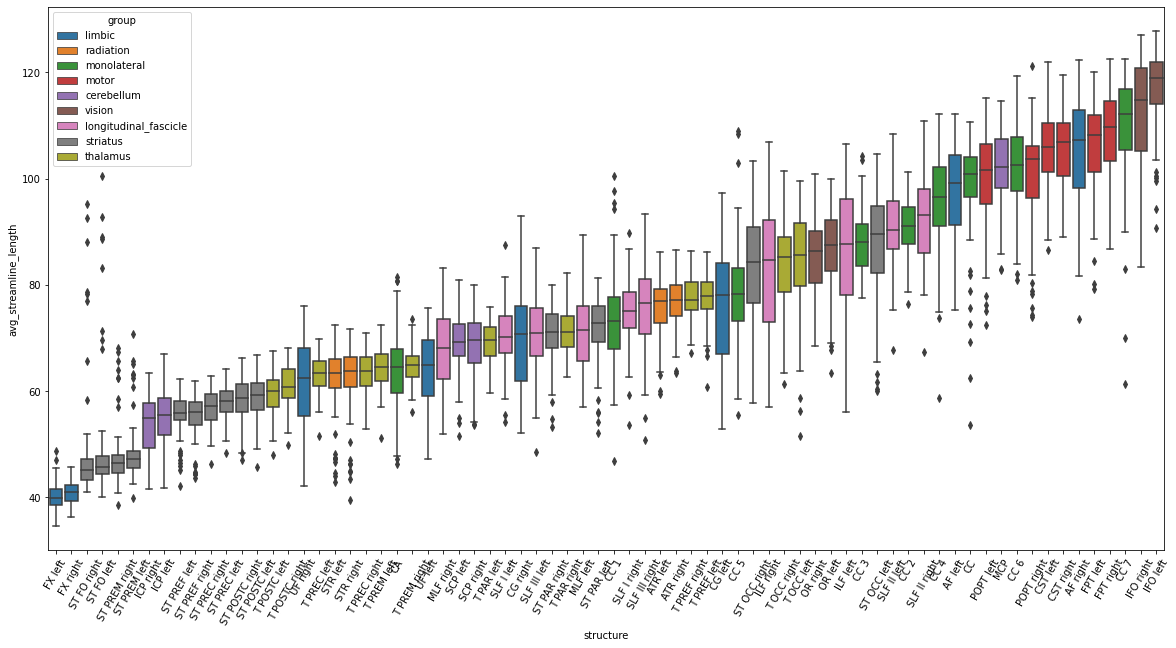

In [30]:
grouped = merged.loc[:, ['structure', 'avg_streamline_length']] \
            .groupby(['structure']) \
            .median() \
            .sort_values(by='avg_streamline_length')

plt.figure(figsize=(20,10))
sns.boxplot(data=merged, x='structure', y='avg_streamline_length', 
            order=grouped.index,
            hue='group',
            dodge=False)
plt.xticks(rotation=60)

### Bundles by volume

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, 'FX right'),
  Text(1, 0, 'FX left'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'ST FO right'),
  Text(4, 0, 'STR left'),
  Text(5, 0, 'ICP right'),
  Text(6, 0, 'STR right'),
  Text(7, 0, 'ST FO left'),
  Text(8, 0, 'ST PREM right'),
  Text(9, 0, 'UF left'),
  Text(10, 0, 'ICP left'),
  Text(11, 0, 'UF right'),
  Text(12, 0, 'CC 1'),
  Text(13, 0, 'ST PREM left'),
  Text(14, 0, 'T POSTC right'),
  Text(15, 0, 'SLF III left'),
  Text(16, 0, 'T PREM right'),
  Text(17, 0, 'ILF right'),
  Text(18, 0, 'OR right'),
  Text(19, 0, 'ILF left'),
  Text(20, 0, 'SCP left'),
  Text(21, 0, 'SCP right'),
  Text(22, 0, 'CST right'),
  Text(23, 0, 'CC 3'),
  Text(24, 0, 'T

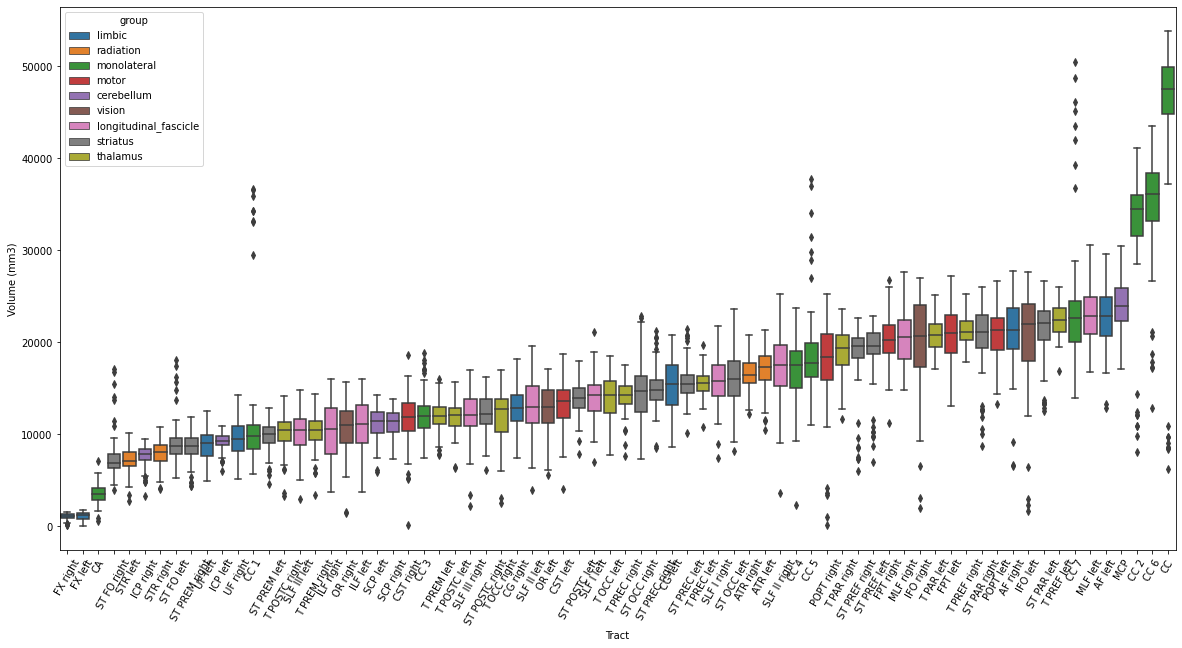

In [29]:
grouped = merged.loc[:, ['structure', 'volume']] \
            .groupby(['structure']) \
            .median() \
            .sort_values(by='volume')

plt.figure(figsize=(20,10))
ax = sns.boxplot(data=merged, x='structure', y='volume', 
                 order=grouped.index,
                 hue='group',
                dodge=False)
ax.set(xlabel="Tract", ylabel='Volume (mm3)')
plt.xticks(rotation=60)

## Bundles by "density"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, 'CC'),
  Text(1, 0, 'CC 2'),
  Text(2, 0, 'ST PREF left'),
  Text(3, 0, 'CC 6'),
  Text(4, 0, 'ST PREF right'),
  Text(5, 0, 'MLF left'),
  Text(6, 0, 'ST PAR left'),
  Text(7, 0, 'MLF right'),
  Text(8, 0, 'T PAR left'),
  Text(9, 0, 'ST PAR right'),
  Text(10, 0, 'T PREF left'),
  Text(11, 0, 'T PREF right'),
  Text(12, 0, 'T PAR right'),
  Text(13, 0, 'ST PREC left'),
  Text(14, 0, 'ST PREC right'),
  Text(15, 0, 'T PREC left'),
  Text(16, 0, 'MCP'),
  Text(17, 0, 'ST POSTC left'),
  Text(18, 0, 'AF left'),
  Text(19, 0, 'CC 5'),
  Text(20, 0, 'T PREC right'),
  Text(21, 0, 'ATR left'),
  Text(22, 0, 'ATR right'),
  Text(23, 0, 'ST PREM left'),
 

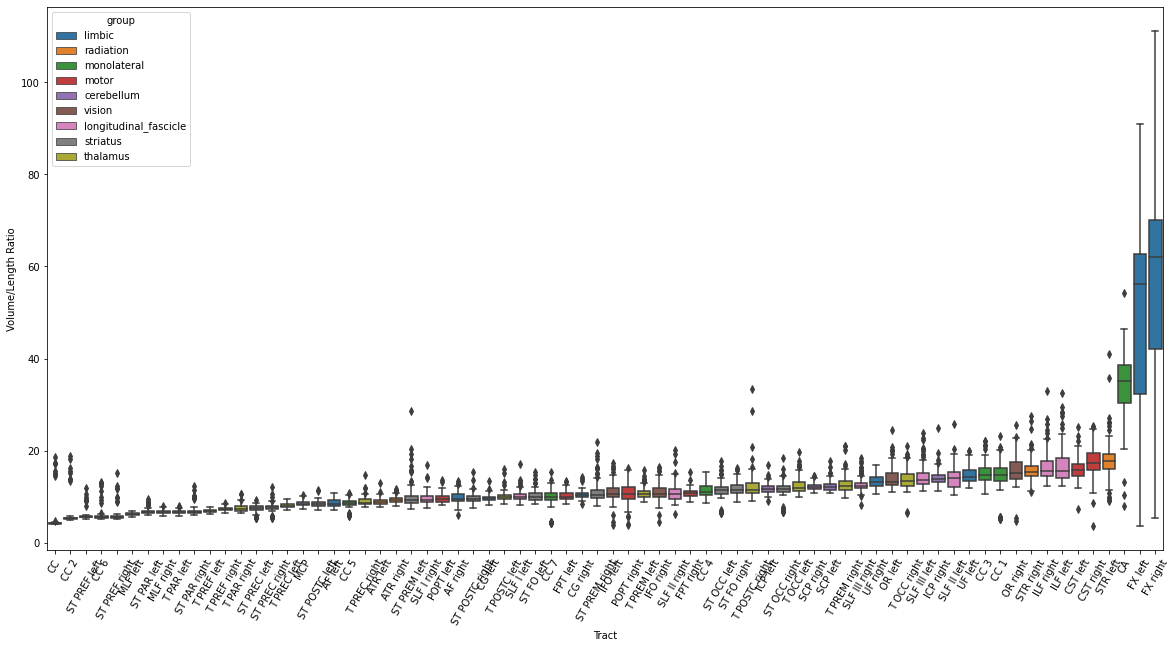

In [32]:
grouped = merged.loc[:, ['structure', 'vol_length_ratio']] \
            .groupby(['structure']) \
            .median() \
            .sort_values(by='vol_length_ratio')

plt.figure(figsize=(20,10))
ax = sns.boxplot(data=merged, x='structure', y='vol_length_ratio', 
                 order=grouped.index,
                 hue='group',
                 dodge=False)
ax.set(xlabel="Tract", ylabel='Volume/Length Ratio')
plt.xticks(rotation=60)